# Laboratorio 1

## Parte 1: Numpy

### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo boolean?

In [2]:
import array

arr = array.array('B', [True] * 1000)
tamano = arr.itemsize * len(arr)

print("Tamaño en bytes:", tamano)


Tamaño en bytes: 1000


### 2. Cree un array cuyos elementos sean los enteros pares en [1, 100] y en orden decreciente. Muestre los 10 últimos por pantalla. 

In [3]:
arr2 = array.array('i', range(0, 101, 2))
#print(arr2)

arr2_invertido = arr2[::-1]
#print(arr2_invertido)

print(arr2_invertido[:10])

array('i', [100, 98, 96, 94, 92, 90, 88, 86, 84, 82])


### 3. Dado el array [2 4 5 6, 0 3 7 4, 8 8 5 2, 1 5 6 1]
### Seleccione con una instrucción el subarray de elementos [0 3 7 4]
### Después, seleccione el subarray de elementos [2 5, 8 5]

In [4]:
import numpy as np
arr3 = np.array([[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]])

In [5]:
subarray = arr3[1]
print(subarray)

[0 3 7 4]


In [6]:
subarray1 = arr3[1:3, 2:]
print(subarray1)

[[7 4]
 [5 2]]


### 4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [7]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
diferencia = a - b
media = np.mean(diferencia)
print(f"La media aritmética es: {media}")

La media aritmética es: -0.25


### 5. Tengo valores de coordenadas (x, y) en las columnas del array [1.33 4.5], [30.0, 10.7]. Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las demensiones del nuevo array

In [8]:
coordenadas = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
coordenadas1 = np.array([[37.1, -3.6]])
coordenadas2 = np.concatenate((coordenadas, coordenadas1))
print(coordenadas2.shape)

(4, 2)


### 6. Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [9]:
coor2_transpuesto = np.transpose(coordenadas2)
print(coor2_transpuesto)

[[ 1.33 30.   70.2  37.1 ]
 [ 4.5  10.7   0.5  -3.6 ]]


In [10]:
par1 = ([[10.8, 3.0]])
par2 = ([[35.8, 12.0]])
par1t = np.transpose(par1)
par2t = np.transpose(par2)
coordenadas3 = np.concatenate((coor2_transpuesto, par1t, par2t), axis=1)
print(coordenadas3)

[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


# Parte 2: Exploración y Minería de Datos

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Esto asume que el dataset se encuentra en la misma carpeta que el notebook
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head(5)

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?

In [13]:
habitantes = dataset[dataset['Poblacion'] > 100000]
num = len(habitantes)
print("Municipios con más de 100,000 habitantes: ", num)

Municipios con más de 100,000 habitantes:  62


### 2. Realice una gráfica de barras sobre la población de cada ciudad, ordenenla de menor a mayor y responda: a) ¿Cuál es la segunda ciudad más poblada? b) ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

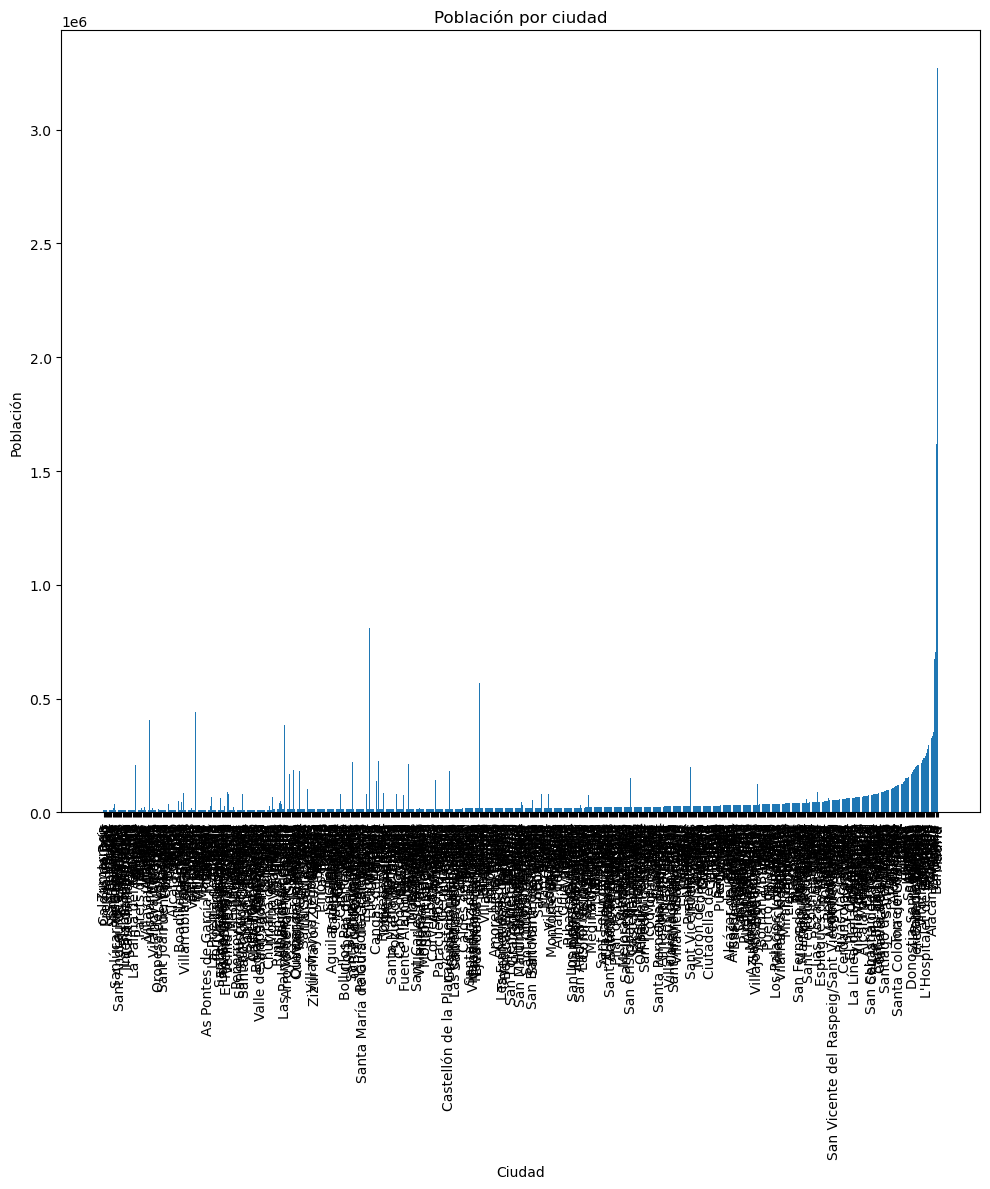

In [14]:
dataordenada = dataset.sort_values(by='Poblacion')

plt.figure(figsize=(10, 12))
plt.bar(dataordenada['Municipio'], dataordenada['Poblacion'])
plt.xlabel('Ciudad')
plt.ylabel('Población')
plt.title('Población por ciudad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
puesto2 = dataordenada['Municipio'].iloc[-2]
print(f"La segunda ciudad más poblada es: {puesto2}")

La segunda ciudad más poblada es: Barcelona


In [16]:
granada = dataordenada[dataordenada['Municipio'] == 'Granada'].index[0] + 1
print(f"La posición de Granada es: {granada}")

La posición de Granada es: 273


### 3. ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?

In [17]:
municipios_navarra = dataset[dataset['Provincia'] == 'Navarra']
habitantes_navarra = municipios_navarra[municipios_navarra['Poblacion'] > 5000]
num_navarra = len(habitantes_navarra)
print("Municipios de Navarra con más de 5,000 habitantes: ", num_navarra)

Municipios de Navarra con más de 5,000 habitantes:  11


### 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [18]:
municipio_norte = dataset.loc[dataset['Y'].idxmax()]
nombre = municipio_norte['Municipio']
provincia = municipio_norte['Provincia']
poblacion = municipio_norte['Poblacion']
print(f"El municipio situado más al norte es {nombre}, en la provincia de {provincia}, con una población de {poblacion}")

El municipio situado más al norte es Viveiro, en la provincia de Lugo, con una población de 16211.0


### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la problación de los municipios de la provincia de Granada.

In [19]:
municipios_granada = dataset[dataset['Provincia'] == 'Granada']
media_poblacion = municipios_granada['Poblacion'].mean()
mediana_poblacion = municipios_granada['Poblacion'].median()
des_poblacion = municipios_granada['Poblacion'].std()
max_poblacion = municipios_granada['Poblacion'].max()
min_poblacion = municipios_granada['Poblacion'].min()

In [20]:
print("Media: ", media_poblacion)
print("Mediana: ", mediana_poblacion)
print("Desviación: ", des_poblacion)
print("Máximo: ", max_poblacion)
print("Mínimo: ", min_poblacion)

Media:  30217.85
Mediana:  17526.0
Desviación:  50355.49171459277
Máximo:  239154.0
Mínimo:  10386.0


### 6. Realice un histograma con la población de los Municipios para cada una de las provincias.

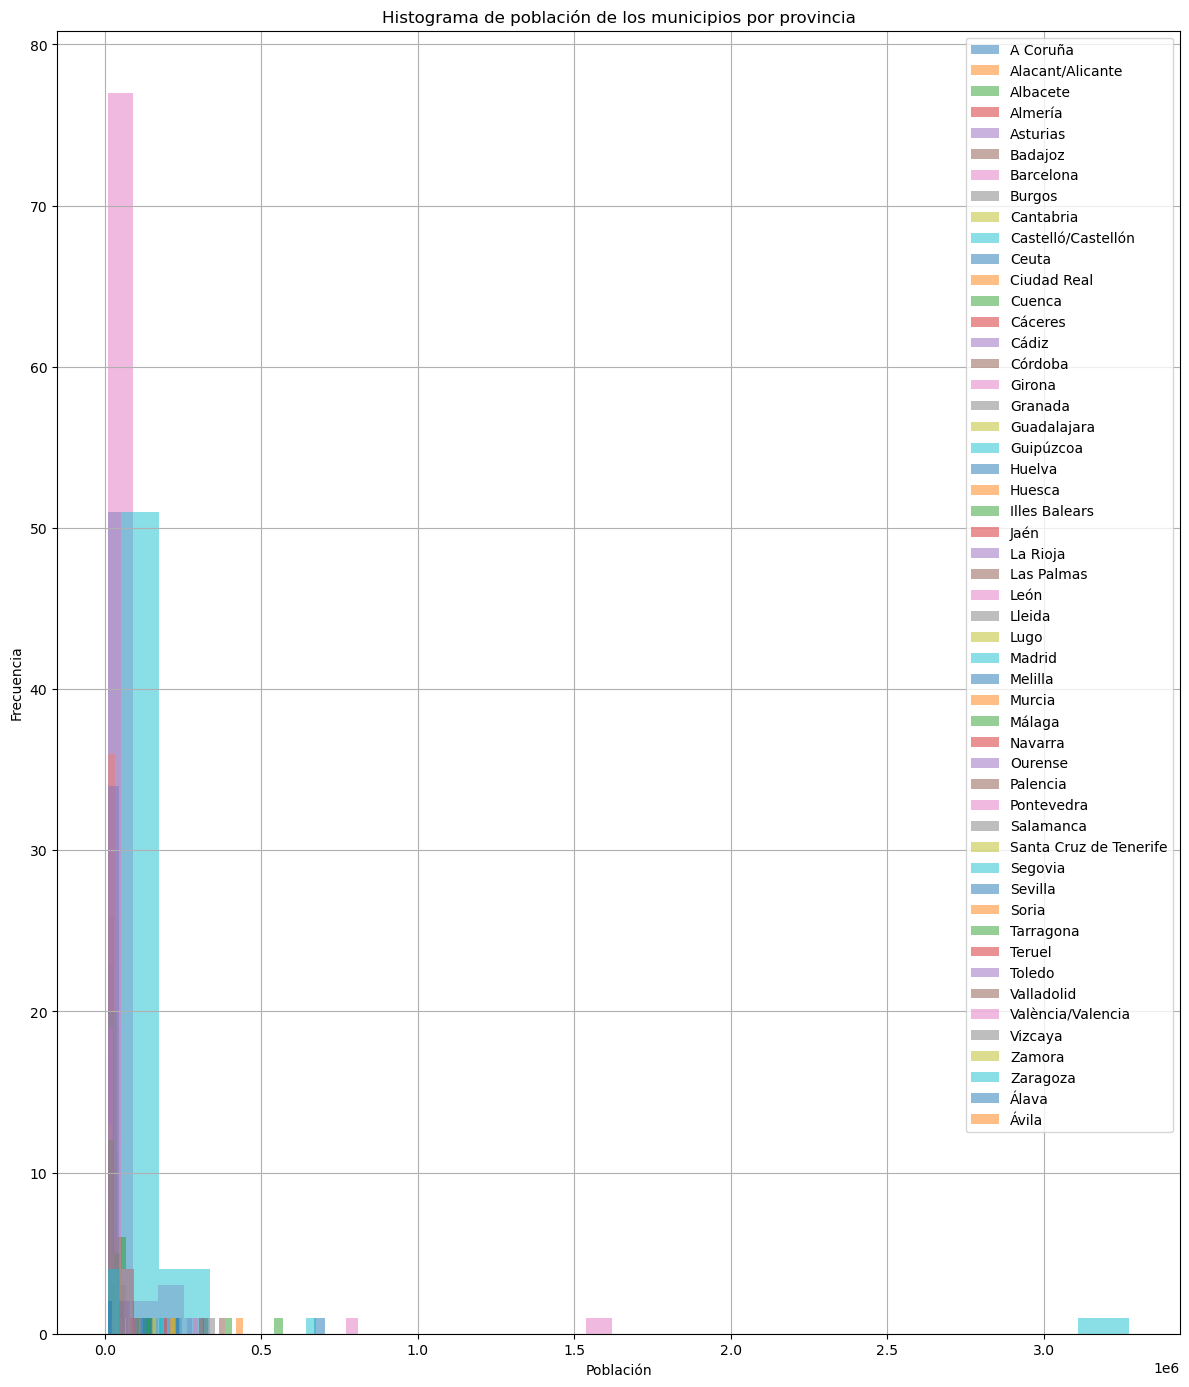

In [21]:
plt.figure(figsize=(12, 14))

for provincia, datos_provincia in dataset.groupby('Provincia'):
    plt.hist(datos_provincia['Poblacion'], bins=20, alpha=0.5, label=provincia)

plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('Histograma de población de los municipios por provincia')
plt.legend()  # Mostrar leyenda con las provincias
plt.grid(True)  # Mostrar cuadrícula en el gráfico
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()

### 7. Seleccione al azar cincuenta municipios diferentes de entre los disponibles en el archivo. Asegúrese de que no se repitan. ¿Luego clacule el promedio de la población y la desviación estándar de estos 50 municipios?

In [22]:
municipios_seleccionados = dataset.sample(n=50, replace=False)
promedio_municipios_seleccionados = municipios_seleccionados['Poblacion'].mean()
des_municipios_seleccionados = municipios_seleccionados['Poblacion'].std()

In [23]:
print("Promedio: ", promedio_municipios_seleccionados)
print("Desviación: ", des_municipios_seleccionados)

Promedio:  31751.14
Desviación:  38456.71807290871
